In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

torch.manual_seed(N_SEED)

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [3]:
def device():
    if torch.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [4]:
def show_corr(features, target):
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="orange", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1"),
        vmax=100,
        vmin=0,
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Quality  Check Dataset

In [5]:
dataset = pd.read_csv("../data/QC.csv")

### EDA

In [6]:
dataset[:TOP_K]

,Voltage,Defect
0,1.10,0
1,1.90,0
2,2.00,0
3,2.30,0
4,2.91,0


In [7]:
dataset.describe()

,Voltage,Defect
count,52.000000,52.000000
mean,5.702308,0.403846
std,2.465469,0.495454
min,1.100000,0.000000
25%,3.600000,0.000000
50%,5.375000,0.000000
75%,7.227500,1.000000
max,12.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  52 non-null     float64
 1   Defect   52 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 964.0 bytes


In [9]:
X_df = dataset.drop(columns=["Defect"], axis=1)
y_df = dataset["Defect"]
X = np.array(X_df)
y = np.array(y_df)

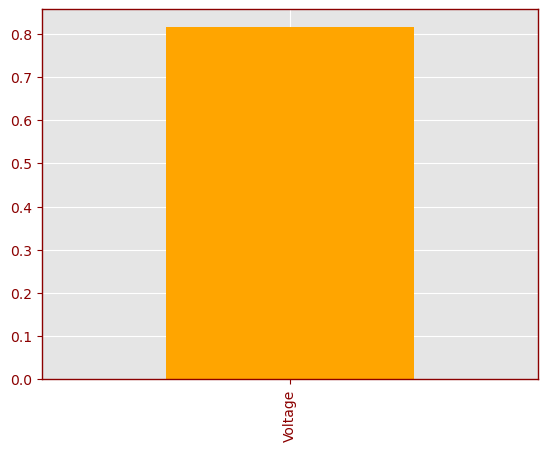

In [10]:
show_corr(X_df, y_df)

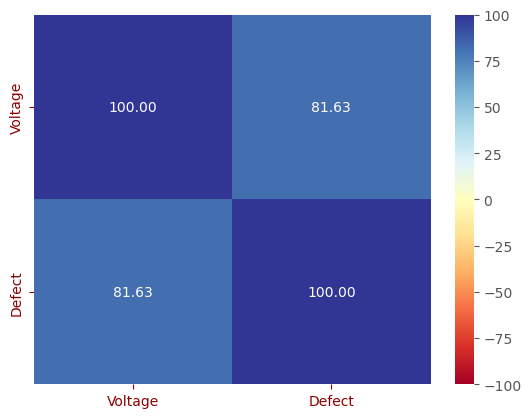

In [11]:
show_corr_heatmap(dataset)

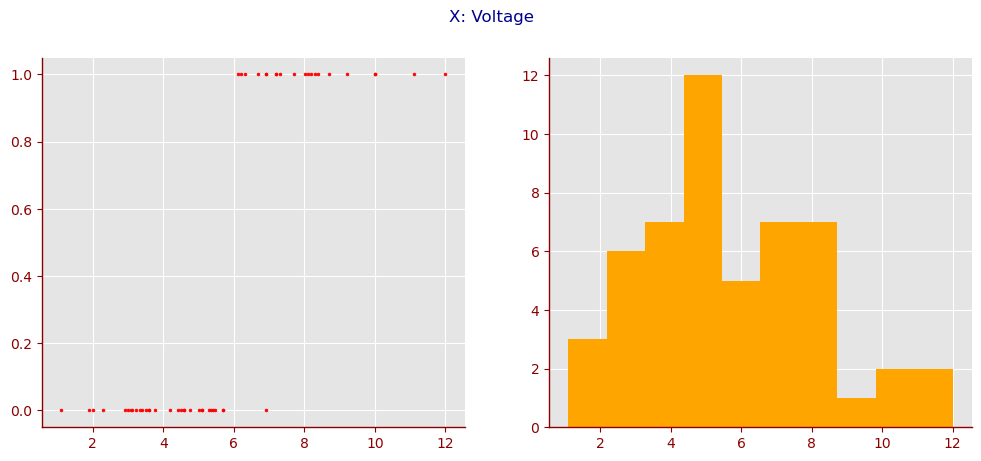

In [12]:
plot_features(X_df, y_df)

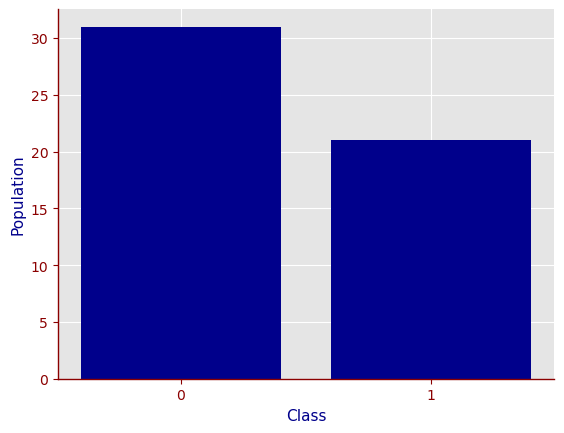

In [13]:
plot_class_dist(y_df)

In [14]:
def to_ts(data):
    return torch.as_tensor(data, dtype=torch.float32, device=device())

In [15]:
scaler = MinMaxScaler()  
X_np = scaler.fit_transform(X)
y_np = y.reshape(-1, 1)

In [16]:
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_np,
    y_np,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

X_train, X_test, y_train, y_test = to_ts(X_train_np), to_ts(X_test_np), to_ts(y_train_np), to_ts(y_test_np)

In [17]:
INPUT_SIZE = 1
HIDDEN_SIZE1 = 3
OUTPUT_SIZE = 1
LR = 0.1
NO_EPOCHS = 500
STEP = 10
BATCH_SIZE = 4

In [18]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._n_samples = len(self._x)

    def __getitem__(self, index):
        return self._x[index], self._y[index]

    def __len__(self):
        return self._n_samples
    
    def x(self):
        return self._x

    def y(self):
        return self._y

class EarlyStop():
    def __init__(self, patience: int=3, delta: float=1e-3, monitor: str="loss"):
        self.patience = patience
        self.pre_indicator = None
        self.delta = delta
        self.counter = 0
        self.stop = False
        self.monitor = monitor
    
    def __call__(self, watch: dict):
        if self.pre_indicator is not None:
            diff = abs(watch[self.monitor] - self.pre_indicator)
            if diff <= self.delta:
                self.counter += 1
            else:
                self.counter = 0
        if self.counter >= self.patience:
            self.stop = True
        self.pre_indicator = watch[self.monitor]
        return self.stop

class ClassifierNN(torch.nn.Module):
    def __init__(self, input: int, hidden1: int, output: int):
        super(ClassifierNN, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=input, out_features=hidden1)
        self.layer2 = torch.nn.Linear(in_features=hidden1, out_features=output)
        self.activation = torch.nn.ReLU()

    def forward(self: torch.nn.Module, x: torch.Tensor) -> torch.nn.Module:
        out = self.layer1(x)
        out = self.activation(out)
        out = self.layer2(out)
        return out

    def fit(
        self: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        optimizer: torch.optim.Optimizer,
        epochs: int=100,
        verbose: int=0,
        step: int=1,
        early_stop: EarlyStop=None,
    ) -> torch.nn.Module:
        if verbose:
            print("---START---")
        recall = 0.0
        loss = torch.nn.Module
        loss_fn = torch.nn.BCEWithLogitsLoss()
        ones = torch.ones(data_loader.batch_size, 1, device=device())
        zeros = torch.zeros(data_loader.batch_size, 1, device=device())
        accuracy = 0.0
        recall = 0.0
        precision = 0.0
        watch = {
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
                "loss": 0.0
        }
        for epoch in range(epochs):
            accuracy = 0.0
            recall = 0.0
            precision = 0.0
            tn = 0.0
            fp = 0.0
            tp = 0.0
            fn = 0.0

            for _X, _y in data_loader:
                y_hat = self(_X)
                loss = loss_fn(y_hat, _y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                y_pred = torch.sigmoid(y_hat).round()
                ones = torch.ones(len(_y), 1, device=device())
                zeros = torch.zeros(len(_y), 1, device=device())
                tn += torch.bitwise_and((y_pred == zeros), (_y == zeros)).sum()
                fp += torch.bitwise_and((y_pred == ones), (_y == zeros)).sum()
                tp += torch.bitwise_and((y_pred == ones), (_y == ones)).sum()
                fn += torch.bitwise_and((y_pred == zeros), (_y == ones)).sum()

            accuracy = (tn + tp)/(tn + tp + fn + fp)
            precision = tp / (fp + tp)
            recall = tp / (fn + tp)
            watch = {
                "loss": loss.detach(),
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
            }
            if (epoch + 1) % step == 0 and verbose:
                print(
                    ">>> Epoch: {}/{}, Loss={:.6f}, Accuracy={:.6f}, Recall={:.6f}, Precision={:.6f}".format(
                        epoch + 1, epochs, watch["loss"], watch["accuracy"], watch["recall"], watch["precision"]
                    )
                )
            if early_stop is not None and early_stop(watch):
                if verbose:
                    print(f"Early stop at epoch: {epoch + 1}/{epochs}")
                break
        if verbose:
            print(
                "Completed, Loss={:.6f}, Accuracy={:.6f}, Recall={:.6f}, Precision={:.6f}".format(
                    watch["loss"], watch["accuracy"], watch["recall"], watch["precision"]
                )
            )
            print("---END---")
        return self

    def predict_proba(self, x : torch.Tensor) -> torch.Tensor:
        y_proba_ones = torch.sigmoid(self(x))
        ones = torch.ones(len(y_proba_ones), 1).to(device())
        y_proba_zeros = ones - y_proba_ones
        return torch.cat((y_proba_zeros, y_proba_ones), 1)

    def predict(self, x : torch.Tensor) -> torch.Tensor:
        return torch.sigmoid(self(x)).round()

In [19]:
data_train = Dataset(
    x=X_train,
    y=y_train
)

data_train_loader = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [20]:
model_ANN = ClassifierNN(
    input=INPUT_SIZE,
    hidden1=HIDDEN_SIZE1,
    output=OUTPUT_SIZE
).to(device=device())

optimizer = torch.optim.SGD(
    model_ANN.parameters(),
    lr=LR,
    momentum=0.9,
)

model_ANN = model_ANN.fit(
    data_loader=data_train_loader,
    optimizer=optimizer,
    epochs=NO_EPOCHS,
    verbose=VERBOSE,
    step=STEP,
)

---START---
>>> Epoch: 10/500, Loss=0.067899, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 20/500, Loss=0.017212, Accuracy=0.926829, Recall=1.000000, Precision=0.823529
>>> Epoch: 30/500, Loss=0.009331, Accuracy=0.902439, Recall=0.785714, Precision=0.916667
>>> Epoch: 40/500, Loss=0.043419, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 50/500, Loss=0.021806, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 60/500, Loss=0.000010, Accuracy=0.878049, Recall=0.714286, Precision=0.909091
>>> Epoch: 70/500, Loss=0.009670, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 80/500, Loss=0.023730, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 90/500, Loss=0.007348, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epoch: 100/500, Loss=4.733429, Accuracy=0.926829, Recall=0.928571, Precision=0.866667
>>> Epoch: 110/500, Loss=0.020717, Accuracy=0.926829, Recall=0.857143, Precision=0.923077
>>> Epo

In [21]:
y_proba = model_ANN.predict_proba(X_test)
y_pred = model_ANN.predict(X_test)

In [22]:
y_proba_np = y_proba.cpu().detach().numpy()
y_pred_np = y_pred.cpu().detach().numpy()

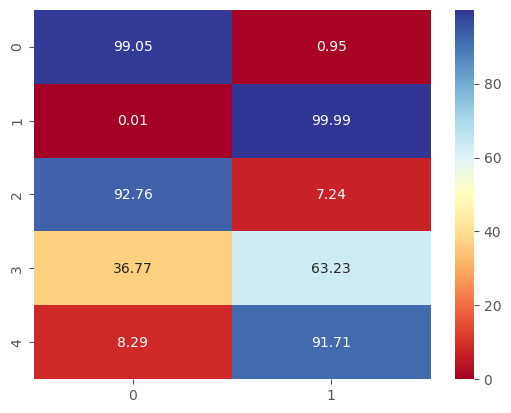

In [23]:
sns.heatmap(y_proba_np[:TOP_K]*100, annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

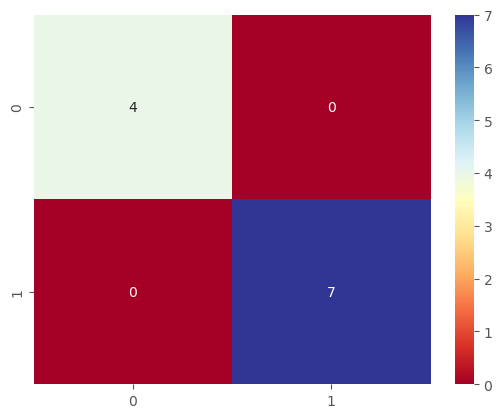

In [24]:
cm_ANN = metrics.confusion_matrix(y_true=y_test_np, y_pred=y_pred_np)
sns.heatmap(cm_ANN, annot=True, cmap=COLOR_MAP, fmt=".0f", vmin=0);

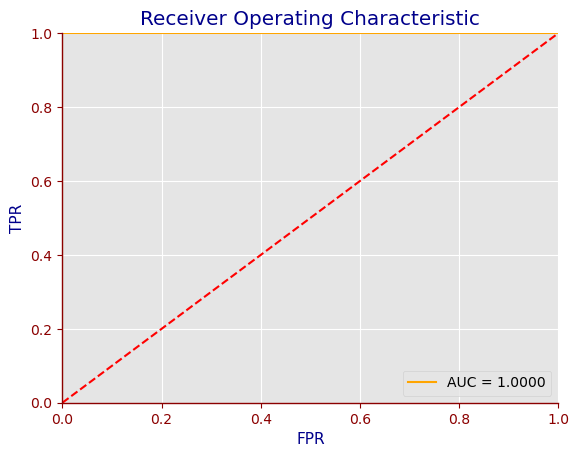

In [25]:
fpr_ANN, tpr_ANN, _ = metrics.roc_curve(y_test_np, y_proba_np[:, 1])
roc_auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
plot_roc(fpr_ANN, tpr_ANN, roc_auc_ANN)

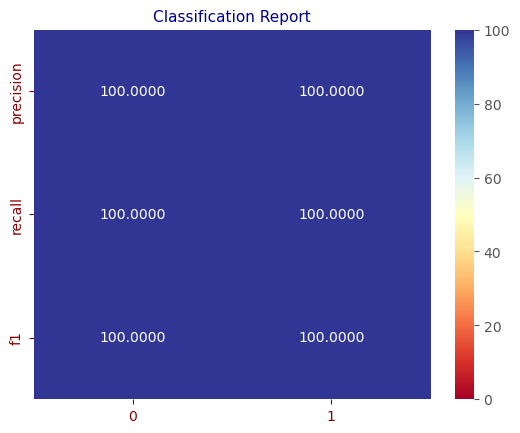

In [26]:
plot_classification(y_true=y_test_np, y_pred=y_pred_np)

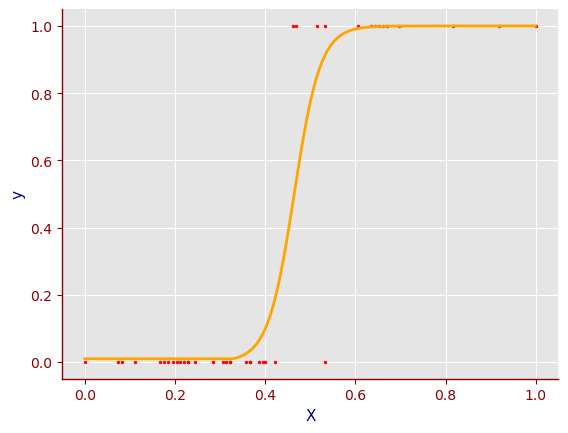

In [27]:
X_gradient = (torch.arange(1000, device=device())*0.001).reshape(-1, 1)
X_gradient_np = X_gradient.squeeze().cpu().detach().numpy()
y_curve =   model_ANN.predict_proba(X_gradient)
y_curve_np = y_curve.cpu().detach().numpy()
plot_Xy2(
    X_train_np,
    y_train_np,
    X_gradient_np,
    y_curve_np[:, 1],
)

In [28]:
metrics.accuracy_score(y_true=y_test_np, y_pred=y_pred_np)

1.0